# Data preparation and exploration

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tqdm import tqdm
import seaborn as sns

np.random.seed(1)

## Loading the dataset

### Read csv file

In [67]:
data_df = pd.read_csv('data.csv')
data_df.head()

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-120.18,36.59,25.0,948.0,198.0,613.0,171.0,2.3026,90.6
1,-122.70,38.45,26.0,2011.0,557.0,855.0,530.0,1.1250,233.3
2,-117.93,33.83,32.0,1792.0,411.0,1131.0,381.0,2.4942,186.3
3,-118.27,33.96,34.0,1040.0,276.0,1083.0,255.0,1.6467,90.9
4,-117.26,34.13,39.0,3521.0,747.0,2256.0,721.0,2.1375,87.5


## Describe Data

In [0]:
data_df.describe()

### Extract column names

In [68]:
column_names = list(data_df.columns)
column_names

['longitude',
 'latitude',
 'housingMedianAge',
 'totalRooms',
 'totalBedrooms',
 'population',
 'households',
 'medianIncome',
 'medianHouseValue']

In [69]:
x_names = column_names[:-1]
y_name = column_names[-1]
x_names, y_name

(['longitude',
  'latitude',
  'housingMedianAge',
  'totalRooms',
  'totalBedrooms',
  'population',
  'households',
  'medianIncome'],
 'medianHouseValue')

### Read the data

In [70]:
X = data_df.drop(columns=[y_name])
y = data_df.drop(columns=x_names)
X.shape, y.shape

((20640, 8), (20640, 1))

In [71]:
X.head()

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome
0,-120.18,36.59,25.0,948.0,198.0,613.0,171.0,2.3026
1,-122.70,38.45,26.0,2011.0,557.0,855.0,530.0,1.1250
2,-117.93,33.83,32.0,1792.0,411.0,1131.0,381.0,2.4942
3,-118.27,33.96,34.0,1040.0,276.0,1083.0,255.0,1.6467
4,-117.26,34.13,39.0,3521.0,747.0,2256.0,721.0,2.1375


In [72]:
y.head()

,medianHouseValue
0,90.6
1,233.3
2,186.3
3,90.9
4,87.5


## Data splitting

### Count the samples

In [73]:
samples_count = len(X)
samples_count

20640

### Split test data

In [0]:
test_size = 0.1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

In [75]:
X_train.head()

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome
5425,-120.33,38.00,14.0,1944.0,330.0,822.0,314.0,3.5000
12499,-119.05,35.34,17.0,2387.0,437.0,1204.0,423.0,4.0529
7020,-122.39,37.78,3.0,3464.0,1179.0,1441.0,919.0,4.7105
6477,-119.29,34.37,41.0,1408.0,311.0,793.0,264.0,2.5441
8670,-118.27,33.95,40.0,935.0,226.0,818.0,236.0,1.8798


In [76]:
y_train.head()

,medianHouseValue
5425,170.7
12499,106.2
7020,275.0
6477,161.2
8670,101.3


In [77]:
X_test.head()

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome
4712,-117.72,34.08,34.0,2742.0,491.0,1761.0,496.0,3.2481
2151,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
15927,-117.75,34.05,46.0,1480.0,358.0,1511.0,348.0,1.9718
82,-117.29,34.14,39.0,1989.0,401.0,805.0,341.0,2.4250
8161,-122.20,39.53,22.0,3265.0,658.0,1647.0,594.0,2.3566


In [78]:
y_test.head()

,medianHouseValue
4712,128.8
2151,82.7
15927,110.6
82,90.0
8161,71.0


In [79]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
X_train.mean(), X_train.std(), X_test.mean(), X_test.std()

(longitude           6.477986e-15
 latitude            2.691155e-15
 housingMedianAge    1.545413e-16
 totalRooms          1.778054e-18
 totalBedrooms      -4.773254e-17
 population          8.990380e-17
 households          3.681618e-17
 medianIncome       -1.705363e-16
 dtype: float64, longitude           1.000027
 latitude            1.000027
 housingMedianAge    1.000027
 totalRooms          1.000027
 totalBedrooms       1.000027
 population          1.000027
 households          1.000027
 medianIncome        1.000027
 dtype: float64, longitude           0.035990
 latitude           -0.034046
 housingMedianAge   -0.003470
 totalRooms          0.024807
 totalBedrooms       0.020994
 population          0.007914
 households          0.018664
 medianIncome        0.016451
 dtype: float64, longitude           1.017651
 latitude            1.006375
 housingMedianAge    1.026226
 totalRooms          1.039789
 totalBedrooms       1.011633
 population          0.983421
 households         

In [80]:
X_train.head()

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome
5425,-0.376576,1.106066,-1.166630,-0.315899,-0.492016,-0.531223,-0.484388,-0.193677
12499,0.263470,-0.140141,-0.927629,-0.112011,-0.237707,-0.194459,-0.198726,0.097669
7020,-1.406648,1.002996,-2.042966,0.383672,1.525820,0.014476,1.101171,0.444185
6477,0.143461,-0.594585,0.984377,-0.562590,-0.537174,-0.556789,-0.615426,-0.697379
8670,0.653497,-0.791355,0.904710,-0.780286,-0.739195,-0.534749,-0.688808,-1.047426


In [81]:
X_test.head()

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome
4712,0.928516,-0.730450,0.426709,0.051376,-0.109364,0.296583,-0.007410,-0.326413
2151,0.268470,-0.126086,1.223378,-0.465939,-0.539551,-0.667868,-0.521079,-0.523014
15927,0.913515,-0.744505,1.382712,-0.529453,-0.425468,0.076187,-0.395283,-0.998947
82,1.143532,-0.702340,0.825043,-0.295188,-0.323269,-0.546210,-0.413628,-0.760138
8161,-1.311641,1.822869,-0.529295,0.292083,0.287548,0.196082,0.249424,-0.796180


## Exploration

### Plot all x - y relations

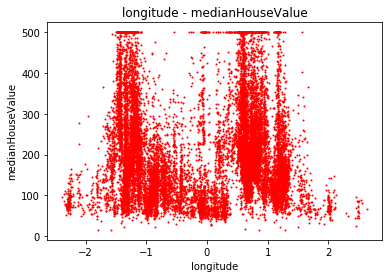

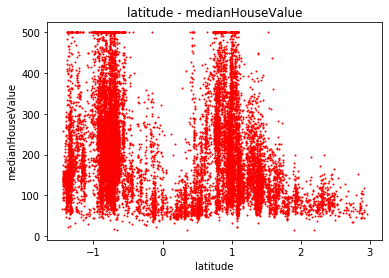

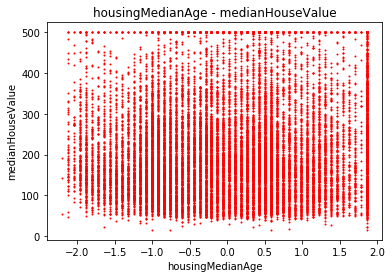

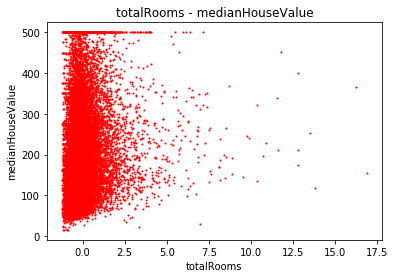

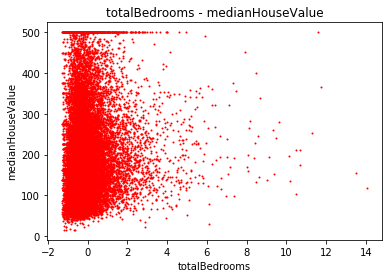

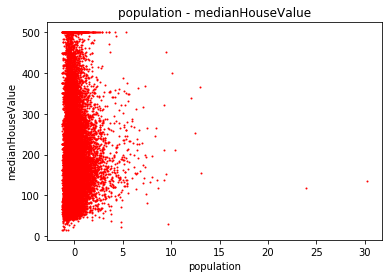

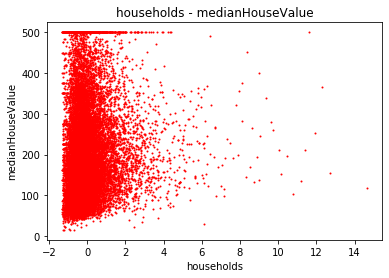

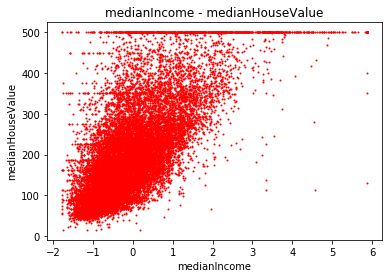

In [82]:
for x_name in x_names:
    plot = plt.plot(X_train[x_name], y_train, 'ro')
    plt.setp(plot, ms=1)
    plt.title(x_name + ' - ' + y_name)
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.show()

## Correlations

### Correlation Matrix

In [83]:
corr_matrix = data_df.corr()
corr_matrix

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
longitude,1.000000,-0.924664,-0.108197,0.044568,0.068378,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066318,-0.108785,-0.071035,-0.079809,-0.144160
housingMedianAge,-0.108197,0.011173,1.000000,-0.361262,-0.320485,-0.296244,-0.302916,-0.119034,0.105623
totalRooms,0.044568,-0.036100,-0.361262,1.000000,0.929893,0.857126,0.918484,0.198050,0.134153
totalBedrooms,0.068378,-0.066318,-0.320485,0.929893,1.000000,0.878026,0.979829,-0.008093,0.050594
population,0.099773,-0.108785,-0.296244,0.857126,0.878026,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979829,0.907222,1.000000,0.013033,0.065843
medianIncome,-0.015176,-0.079809,-0.119034,0.198050,-0.008093,0.004834,0.013033,1.000000,0.688075
medianHouseValue,-0.045967,-0.144160,0.105623,0.134153,0.050594,-0.024650,0.065843,0.688075,1.000000


### Plot correlation matrix

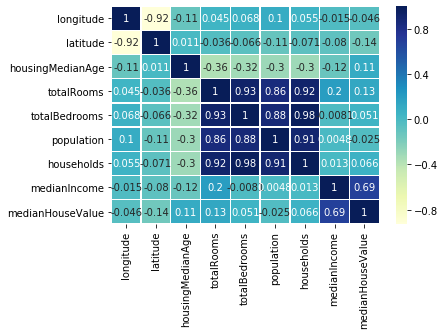

In [84]:
sns.heatmap(corr_matrix, 
            cmap = 'YlGnBu',
            annot = True,
            linewidths = .3,
            linecolor = 'white'
           )

# Simple Linear Model

## Pipelines in scikit-learn

In [0]:
inpute_scale = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

In [0]:
preprocessor = ColumnTransformer(transformers=[('preprocessor', inpute_scale, list(data_df.columns))])

## Training the model

In [0]:
feature_name = 'medianIncome'
x_train = X_train[[feature_name]]
x_test = X_test[[feature_name]]

### Define the model

In [0]:
linear_model = LinearRegression()

### Fit the model

In [89]:
linear_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Predict

In [0]:
prediction_train = linear_model.predict(x_train)
prediction_test = linear_model.predict(x_test)

### Plot predictions

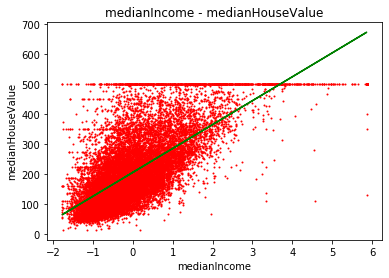

In [91]:
plot = plt.plot(x_train, y_train, 'ro')
plt.setp(plot, ms=1)
plot = plt.plot(x_train, prediction_train, 'g')
plt.setp(plot, ms=1)
plt.title(feature_name + ' - ' + y_name)
plt.xlabel(x_name)
plt.ylabel(y_name)
plt.show()

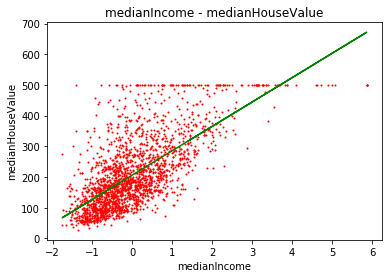

In [92]:
plot = plt.plot(x_test, y_test, 'ro')
plt.setp(plot, ms=1)
plot = plt.plot(x_test, prediction_test, 'g')
plt.setp(plot, ms=1)
plt.title(feature_name + ' - ' + y_name)
plt.xlabel(x_name)
plt.ylabel(y_name)
plt.show()

### Evaluation

In [93]:
mean_squared_error(y_train, prediction_train)

6983.78044068417

In [94]:
mean_squared_error(y_test, prediction_test)

7260.044838190996

# Linear Models

## PCA

### Calculate Principal Components

In [95]:
n_components = X_train.shape[1]
pca = PCA(n_components=n_components)
X_train_PCA = pd.DataFrame(pca.fit_transform(X_train), index=X_train.index, columns=list(['PC' + str(x + 1) for x in range(n_components)]))
X_train_PCA.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
5425,-0.748693,0.933183,0.456342,-1.353995,-0.084451,-0.301632,-0.214853,-0.072318
12499,-0.124986,-0.339997,0.494234,-0.852647,0.006265,-0.017375,0.016580,-0.048357
7020,1.764951,1.837738,1.024284,-1.384455,-0.644098,0.998390,-0.268743,0.318927
6477,-1.290473,-0.607713,-0.882719,0.436176,-0.067217,0.093436,0.323126,0.039217
8670,-1.465398,-1.124860,-1.186423,0.164060,0.048658,-0.029023,0.177875,-0.050029


### Correlations

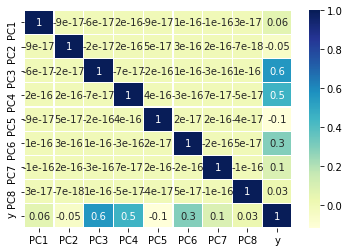

In [96]:
sns.heatmap(X_train_PCA.assign(y = y_train).corr(), 
            cmap = 'YlGnBu',
            annot = True,
            linewidths = .3,
            linecolor = 'white',
            fmt='.1g'
           )

### Calculate their variances

In [97]:
for i in range(1, n_components + 1):
    pca_name = 'PC' + str(i)
    print("variance of " + pca_name + ": " + str(np.var(X_train_PCA[pca_name])))

variance of PC1: 3.9008040131739854
variance of PC2: 1.9073963992940925
variance of PC3: 1.0706131172673257
variance of PC4: 0.8265631476448714
variance of PC5: 0.15091958763875396
variance of PC6: 0.081655310508509
variance of PC7: 0.04715667722678832
variance of PC8: 0.01489174724568027


### PCA with 4 components

In [98]:
n_components = 4
pca = PCA(n_components=n_components)
X_train_PCA = pd.DataFrame(pca.fit_transform(X_train), index=X_train.index, columns=list(['PC' + str(x + 1) for x in range(n_components)]))
X_train_PCA.head()

,PC1,PC2,PC3,PC4
5425,-0.748693,0.933183,0.456342,-1.353995
12499,-0.124986,-0.339997,0.494234,-0.852647
7020,1.764951,1.837738,1.024284,-1.384455
6477,-1.290473,-0.607713,-0.882719,0.436176
8670,-1.465398,-1.124860,-1.186423,0.164060


### Also transform X_test for later use

In [99]:
X_test_PCA = pd.DataFrame(pca.transform(X_test), index=X_test.index, columns=list(['PC' + str(x + 1) for x in range(n_components)]))
X_test_PCA.head()

,PC1,PC2,PC3,PC4
4712,0.124992,-1.142085,-0.533630,0.275377
2151,-1.319903,-0.359056,-0.810190,0.675145
15927,-0.842424,-1.197129,-1.458354,0.712896
82,-0.836019,-1.338721,-0.955490,0.273605
8161,0.344924,2.280215,-0.466057,-0.784942


## Normal Equation

### Prepare Matrixes

#### Copy X before editing it

In [100]:
XM = X_train_PCA.copy()
XM.head()

,PC1,PC2,PC3,PC4
5425,-0.748693,0.933183,0.456342,-1.353995
12499,-0.124986,-0.339997,0.494234,-0.852647
7020,1.764951,1.837738,1.024284,-1.384455
6477,-1.290473,-0.607713,-0.882719,0.436176
8670,-1.465398,-1.124860,-1.186423,0.164060


#### Add column X0 = 1 for bias

In [101]:
XM.insert(loc=0, column='X0', value=1)
XM.head()

,X0,PC1,PC2,PC3,PC4
5425,1,-0.748693,0.933183,0.456342,-1.353995
12499,1,-0.124986,-0.339997,0.494234,-0.852647
7020,1,1.764951,1.837738,1.024284,-1.384455
6477,1,-1.290473,-0.607713,-0.882719,0.436176
8670,1,-1.465398,-1.124860,-1.186423,0.164060


#### Same for X_test

In [102]:
XM_test = X_test_PCA.copy()
XM_test.insert(loc=0, column='X0', value=1)
XM_test.head()

,X0,PC1,PC2,PC3,PC4
4712,1,0.124992,-1.142085,-0.533630,0.275377
2151,1,-1.319903,-0.359056,-0.810190,0.675145
15927,1,-0.842424,-1.197129,-1.458354,0.712896
82,1,-0.836019,-1.338721,-0.955490,0.273605
8161,1,0.344924,2.280215,-0.466057,-0.784942


#### Prepare y

In [103]:
yM = y_train.copy()
yM.head()

,medianHouseValue
5425,170.7
12499,106.2
7020,275.0
6477,161.2
8670,101.3


#### Same for y_test

In [104]:
yM_test = y_test.copy()
yM_test.head()

,medianHouseValue
4712,128.8
2151,82.7
15927,110.6
82,90.0
8161,71.0


#### Convert to numpy

In [105]:
XM = XM.to_numpy()
XM_test = XM_test.to_numpy()
yM = yM.to_numpy()
yM_test = yM_test.to_numpy()
XM.shape, yM.shape, XM_test.shape, yM_test.shape

((18576, 5), (18576, 1), (2064, 5), (2064, 1))

### Train

In [106]:
XTX = np.dot(XM.T, XM)
XTXinv = np.linalg.pinv(XTX)
XTy = np.dot(XM.T, yM)
theta = np.dot(XTXinv, XTy)
theta

array([[206.41798896],
       [  3.59632249],
       [ -4.4426675 ],
       [ 62.05672634],
       [ 57.50254678]])

### Evaluate

#### Make predictions

In [107]:
prediction_train = np.dot(XM, theta)
prediction_test = np.dot(XM_test, theta)
prediction_train.shape, prediction_test.shape

((18576, 1), (2064, 1))

#### Plot train predictions

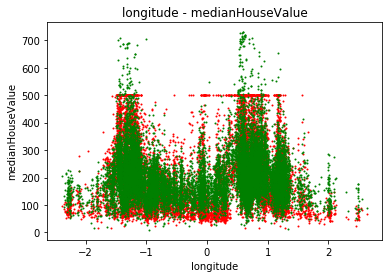

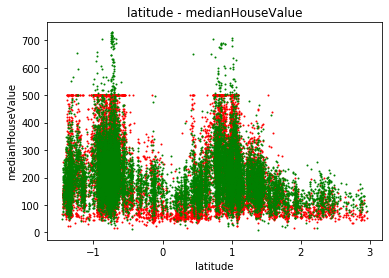

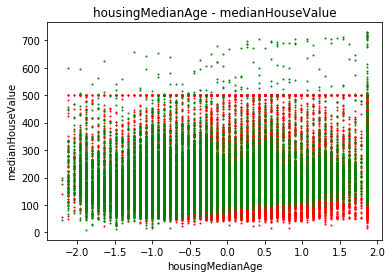

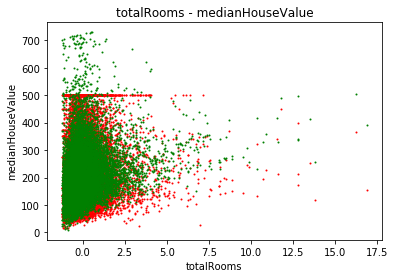

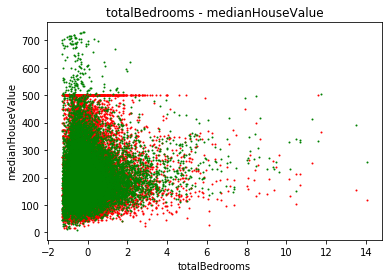

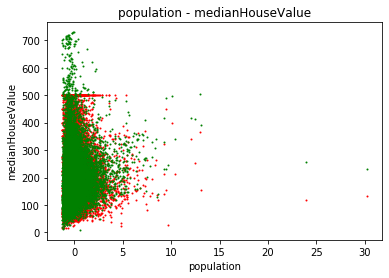

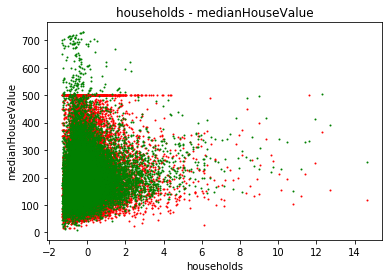

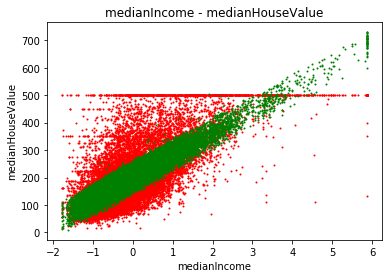

In [108]:
for x_name in x_names:
    plot = plt.plot(X_train[x_name], y_train, 'ro')
    plt.setp(plot, ms=1)
    plot = plt.plot(X_train[x_name], prediction_train, 'go')
    plt.setp(plot, ms=1)
    plt.title(x_name + ' - ' + y_name)
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.show()

#### Plot test predictions

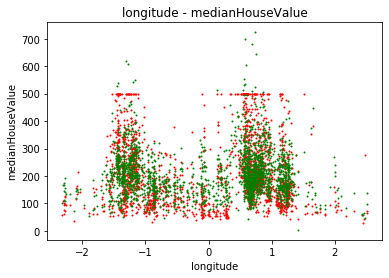

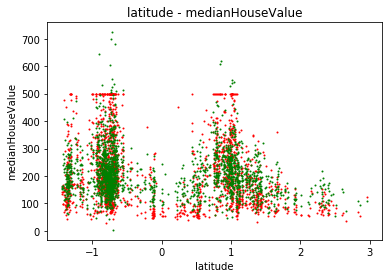

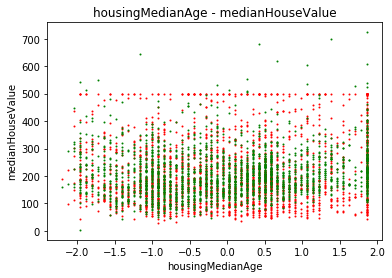

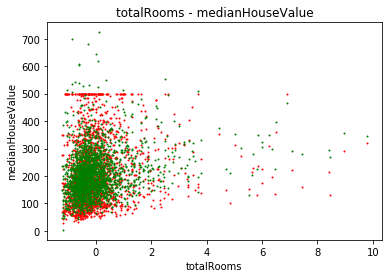

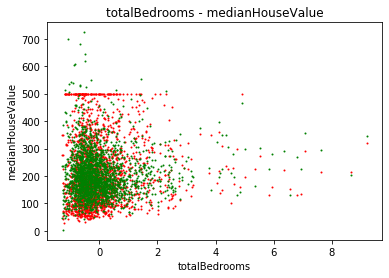

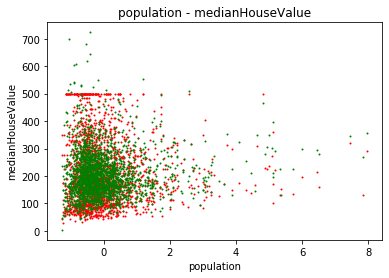

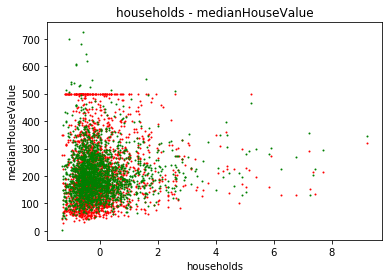

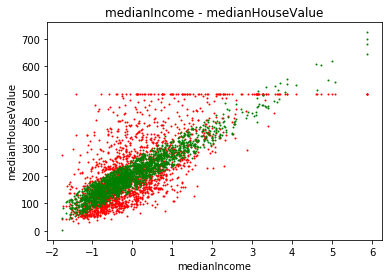

In [54]:
for x_name in x_names:
    plot = plt.plot(X_test[x_name], y_test, 'ro')
    plt.setp(plot, ms=1)
    plot = plt.plot(X_test[x_name], prediction_test, 'go')
    plt.setp(plot, ms=1)
    plt.title(x_name + ' - ' + y_name)
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.show()

#### MSE

In [55]:
mean_squared_error(y_train, prediction_train)

6325.671919334047

In [56]:
mean_squared_error(y_test, prediction_test)

6452.157373814732

## Gradient Descent

#### Function to calculate cost

In [0]:
def calc_cost(prediction, y):
    return np.sum((prediction - y) ** 2) / (2 * len(y))

### Batch Gradient Descent

#### Define the Learning Rate and number of iterations

In [0]:
iterations = 1000
lr = 1e-2

#### Initialize weights and list of costs

In [0]:
theta = np.random.randn(XM.shape[1],1)
costs = []

#### Train

In [60]:
for iteration in tqdm(range(iterations)):
    prediction = np.dot(XM, theta)
    costs.append(calc_cost(prediction, yM))
    gradients = 2. / len(XM) * np.dot(XM.T, prediction - yM)
    theta = theta - lr * gradients
theta

100%|██████████| 1000/1000 [00:00<00:00, 3836.40it/s]


array([[206.41798861],
       [  3.59632249],
       [ -4.4426675 ],
       [ 62.05672631],
       [ 57.50254342]])

#### Plot cost for each iteration

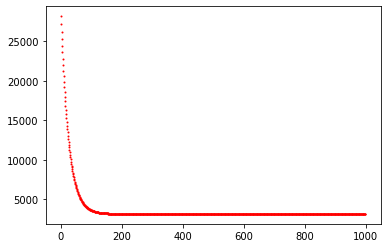

In [61]:
plot = plt.plot(list(range(iterations)), costs, 'ro')
plt.setp(plot, ms=1)
plt.show()

### Stochastic Gradient Descent (Optional)

#### Define number of iterations and Learning Schedule

In [0]:
iterations = 100

t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t): 
    return t0 / (t + t1)

#### Initialize weights and list of costs

In [0]:
theta = np.random.randn(XM.shape[1],1)
costs = []

#### Train

In [64]:
for iteration in tqdm(range(iterations)): 
    for i in range(len(XM)):
        random_index = np.random.randint(len(XM))
        xi = XM[random_index:random_index+1]
        yi = yM[random_index:random_index+1]
        gradients = 2 * np.dot(xi.T, np.dot(xi, theta) - yi)
        eta = learning_schedule(iteration * len(XM) + i)
        theta = theta - eta * gradients
    costs.append(calc_cost(np.dot(XM, theta), yM))
theta

100%|██████████| 100/100 [00:46<00:00,  2.15it/s]


array([[206.34466846],
       [  3.48561274],
       [ -4.30503113],
       [ 62.14206969],
       [ 57.66418126]])

#### Plot cost for each iteration

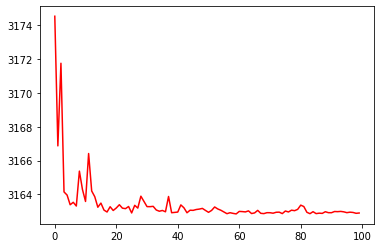

In [65]:
plot = plt.plot(list(range(iterations)), costs, 'r')
plt.setp(plot, ms=1)
plt.show()

# Polynomial Models

## Create a function to train a polynomial model

In [0]:
def train_predict_poly(degree):
  # calculate polynomial features
  poly_features = PolynomialFeatures(degree=degree)
  X_train_features = poly_features.fit_transform(X_train_PCA)
  X_test_features = poly_features.fit_transform(X_test_PCA)

  model = LinearRegression()
  model.fit(X_train_features, y_train)

  train_prediction = model.predict(X_train_features)
  test_prediction = model.predict(X_test_features)

  return train_prediction, test_prediction

## Run the function for degrees 1 to 9

In [133]:
degree_list = list(range(1, 10))

train_mses = []
test_mses = []
for degree in tqdm(degree_list):
  train_prediction, test_prediction = train_predict_poly(degree)
  train_mses.append(mean_squared_error(train_prediction, y_train))
  test_mses.append(mean_squared_error(test_prediction, y_test))

len(train_mses), len(test_mses)


100%|██████████| 9/9 [00:05<00:00,  1.12s/it]


(9, 9)

## Plot train and test losses (Observe overfit)

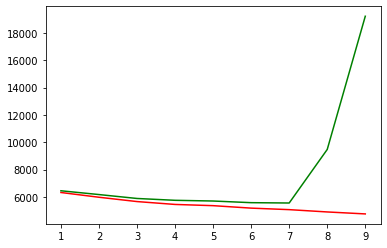

In [136]:
plt.plot(degree_list, train_mses, 'r')
plt.plot(degree_list, test_mses, 'g')
plt.show()